In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from projected_OU_process import *

### Single OU process

Negative values are allowed

Theoretical variance: 3.9999999999999996
Sample variance: 3.968473544604371
Var from PSD = 3.9898141277807246


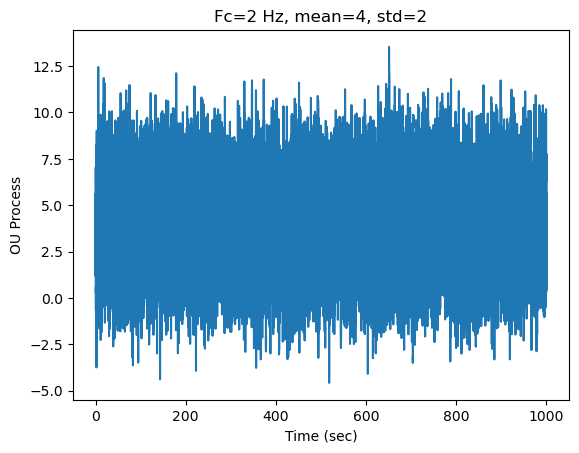

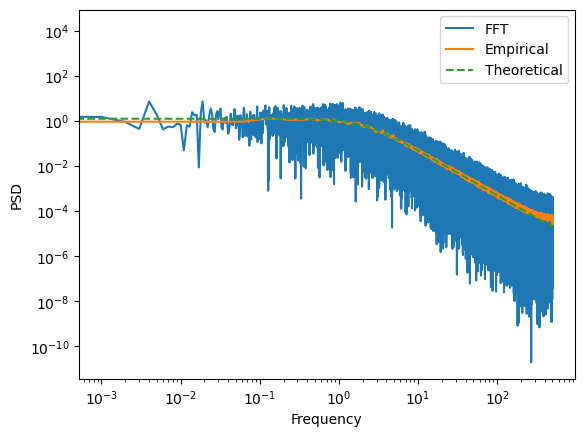

In [2]:
T = 1000
dt = 1e-3
fc = 2  # Hz
mean = 4.
std = 2.
t, x = ornstein_uhlenbeck(T, fc=fc, mean=mean, std=std, nonnegative=False, rng=42)

plt.figure()
plt.plot(t, x)
plt.xlabel("Time (sec)")
plt.ylabel("OU Process")
plt.title(f"Fc={fc:g} Hz, mean={mean:g}, std={std:g}")


# Compute FFT power spectrum
fs = 1 / dt
f_fft = np.fft.rfftfreq(len(x), d=dt)
sxx_fft = (np.abs(np.fft.rfft(x)) ** 2) / len(x) / fs
sxx_fft[1:-1] *= 2
# Compute Welch power spectrum
f, sxx = sp.signal.welch(x, fs=fs, nperseg=int(2 ** np.ceil(np.log2(10 * fs))))

# Theoretical spectrum
theta = 2 * np.pi * fc
sigma = std * np.sqrt(2 * theta)
sxx_theoretical = 2 * sigma ** 2 / (theta ** 2 + (2 * np.pi * f_fft) ** 2)  # to two-sided PSD

# Compare variances
print("Theoretical variance:", sigma ** 2 / (2 * theta))
print("Sample variance:", np.var(x))
int_psd = np.trapz(sxx_theoretical, f_fft)  # integral over f >= 0
print("Var from PSD =", int_psd)

plt.figure()
plt.plot(f_fft, sxx_fft, label='FFT')
plt.plot(f, sxx, label='Empirical')
plt.plot(f_fft, sxx_theoretical, '--', label='Theoretical')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.legend()
plt.show()

### Multiple independent OU processes

Non-negative value is enforced. Initial value set to 0. It takes roughly 1/fc time to reach stationary state.

Sample variance: [0.56977763 0.63327217 0.63141579 0.64022129 0.55250996]


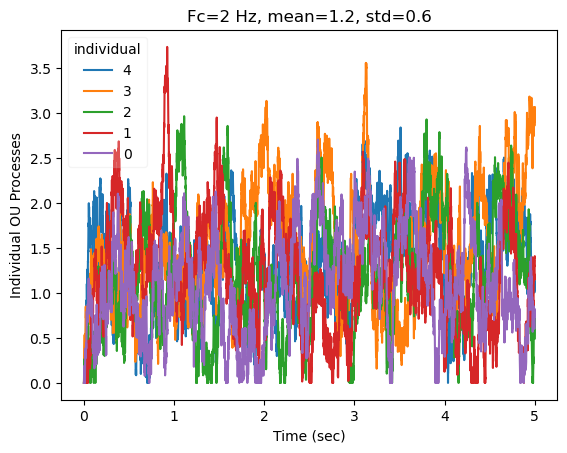

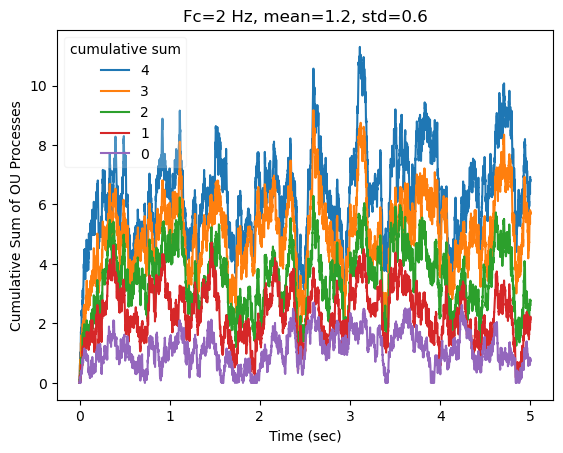

In [3]:
rng = np.random.default_rng(42)

N = 5
T = 5
fc = 2  # Hz
mean = 1.2
std = 0.6

xs = []
for _ in range(N):
    t, x = ornstein_uhlenbeck(T, fc=fc, mean=mean, std=std, x0=0., nonnegative=True, rng=rng)
    xs.append(x)
xs = np.array(xs).T

ys = np.cumsum(xs, axis=1)

# Sample std
print("Sample variance:", np.std(xs, axis=0))

plt.figure()
for i in range(xs.shape[1] - 1, -1, -1):
    plt.plot(t, xs[:, i], label=str(i))
plt.xlabel("Time (sec)")
plt.ylabel("Individual OU Processes")
plt.title(f"Fc={fc:g} Hz, mean={mean:g}, std={std:g}")
plt.legend(title='individual', framealpha=0.2)

plt.figure()
for i in range(N - 1, -1, -1):
    plt.plot(t, ys[:, i], label=str(i))
plt.xlabel("Time (sec)")
plt.ylabel("Cumulative Sum of OU Processes")
plt.title(f"Fc={fc:g} Hz, mean={mean:g}, std={std:g}")
plt.legend(title='cumulative sum', framealpha=0.2)

plt.show()

### Multiple coupled OU processes

Negative values are allowed. Initial values are all set to 1.2. It takes roughly 1/fc time to reach stationary state.

Sample variance: [0.70361343 0.51338058 0.5000353  0.85120589 0.96227905]


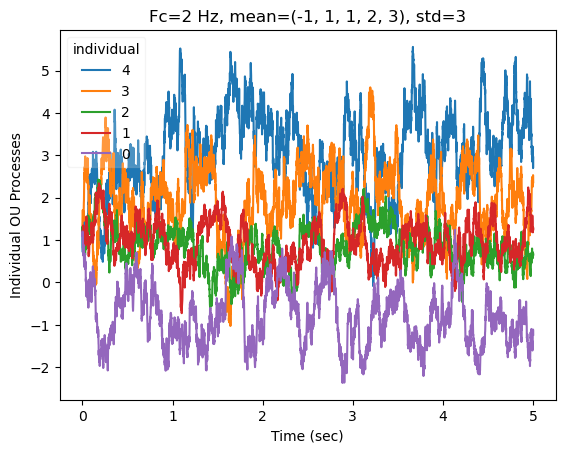

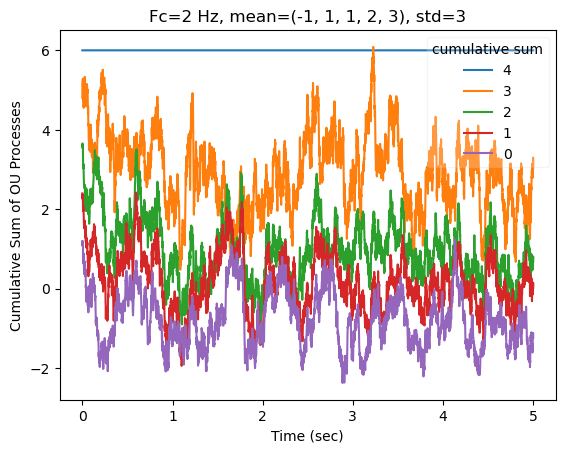

In [4]:
T = 5
fc = 2  # Hz
mean = [-1, 1, 1, 2, 3]  # C = sum(mean_i) = 6
std = 3.  # std = sum(std_i) = 3
x0 = np.array([1.2] * 5)

t, xs = projected_ou_magnitude(T, fc=fc, mean=mean, std=std, x0=x0, nonnegative=False, rng=42)

ys = np.cumsum(xs, axis=1)

# Sample std
print("Sample variance:", np.std(xs, axis=0))

plt.figure()
for i in range(xs.shape[1] - 1, -1, -1):
    plt.plot(t, xs[:, i], label=str(i))
plt.xlabel("Time (sec)")
plt.ylabel("Individual OU Processes")
plt.title(f"Fc={fc:g} Hz, mean=({f', '.join(f'{m:g}' for m in mean):s}), std={std:g}")
plt.legend(title='individual', framealpha=0.2)

plt.figure()
for i in range(ys.shape[1] - 1, -1, -1):
    plt.plot(t, ys[:, i], label=str(i))
plt.xlabel("Time (sec)")
plt.ylabel("Cumulative Sum of OU Processes")
plt.title(f"Fc={fc:g} Hz, mean=({f', '.join(f'{m:g}' for m in mean):s}), std={std:g}")
plt.legend(title='cumulative sum', framealpha=0.2)

plt.show()

Non-negative value is enforced. Initial values are set to the mean of each process.

Sample variance: [0.19517286 0.36175421 0.48309251 0.62253776 0.71974149]


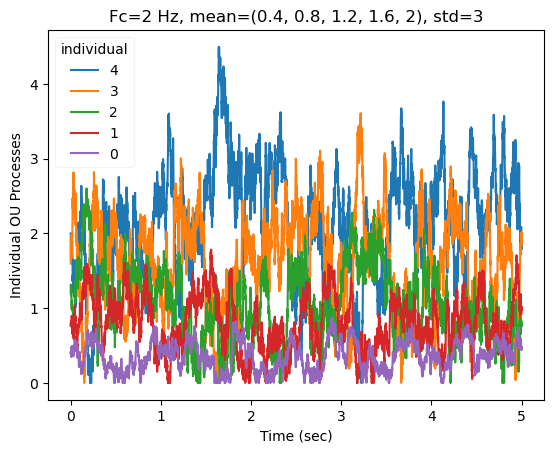

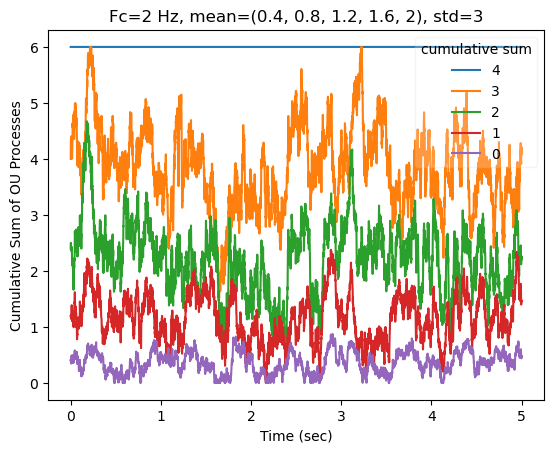

In [5]:
T = 5
fc = 2  # Hz
mean = [0.4, 0.8, 1.2, 1.6, 2]  # C = sum(mean_i) = 6
std = 3.  # std = sum(std_i) = 3

t, xs = projected_ou_magnitude(T, fc=fc, mean=mean, std=std, nonnegative=True, rng=42)

ys = np.cumsum(xs, axis=1)

# Sample std
print("Sample variance:", np.std(xs, axis=0))

plt.figure()
for i in range(xs.shape[1] - 1, -1, -1):
    plt.plot(t, xs[:, i], label=str(i))
plt.xlabel("Time (sec)")
plt.ylabel("Individual OU Processes")
plt.title(f"Fc={fc:g} Hz, mean=({f', '.join(f'{m:g}' for m in mean):s}), std={std:g}")
plt.legend(title='individual', framealpha=0.2)

plt.figure()
for i in range(ys.shape[1] - 1, -1, -1):
    plt.plot(t, ys[:, i], label=str(i))
plt.xlabel("Time (sec)")
plt.ylabel("Cumulative Sum of OU Processes")
plt.title(f"Fc={fc:g} Hz, mean=({f', '.join(f'{m:g}' for m in mean):s}), std={std:g}")
plt.legend(title='cumulative sum', framealpha=0.2)

plt.show()